In [1]:
import pandas as pd
from pandas import Series,DataFrame

In [2]:
titanic_df  = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our new data analysis skills!

First some basic questions:

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2.) What deck were the passengers on and how does that relate to their class?
3.) Where did the passengers come from?
4.) Who was alone and who was with family?

Then we'll dig deeper, with a broader question:

5.) What factors helped someone survive the sinking?
So let's start with the first question: Who were the passengers on the titanic?

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

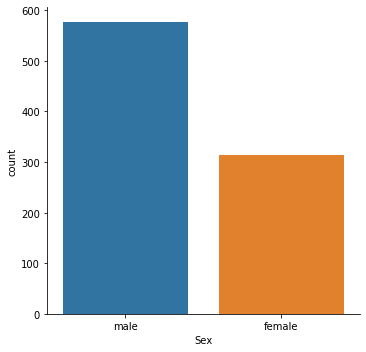

In [6]:
sns.catplot("Sex",data = titanic_df,kind = "count")

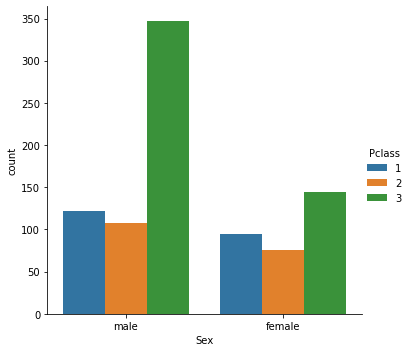

In [7]:
sns.catplot("Sex",data = titanic_df,hue = 'Pclass',kind = "count")

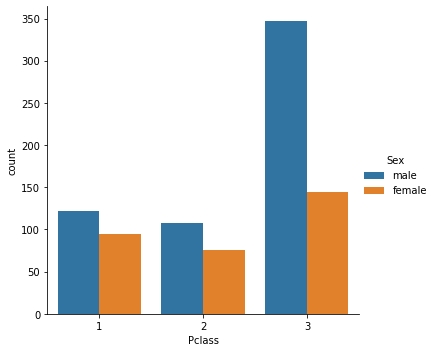

In [8]:
sns.catplot("Pclass",data = titanic_df,hue = 'Sex',kind = "count")

In [9]:
def male_female_child (passenger):
    age, sex = passenger
    
    if(age < 16):
        return 'child'
    else:
        return sex

In [10]:
# We'll define a new column called 'person', remember to specify axis=1 for columns and not index
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [11]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


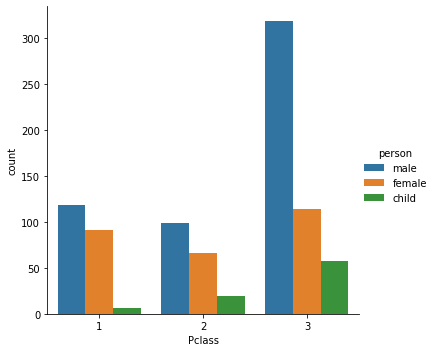

In [12]:
sns.catplot("Pclass",data = titanic_df,hue = 'person',kind = "count")

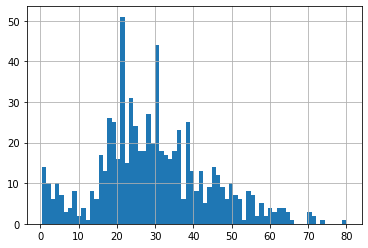

In [13]:
titanic_df['Age'].hist(bins = 70)

In [14]:
titanic_df['Age'].mean()

29.69911764705882

In [15]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

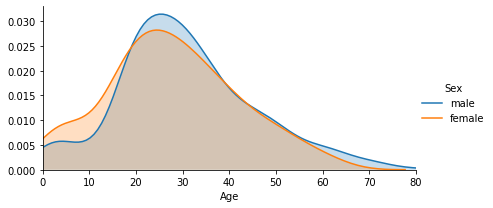

In [16]:
fig = sns.FacetGrid(titanic_df,hue = 'Sex',aspect = 2)
fig.map(sns.kdeplot,'Age',shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim = (0,oldest))
fig.add_legend()

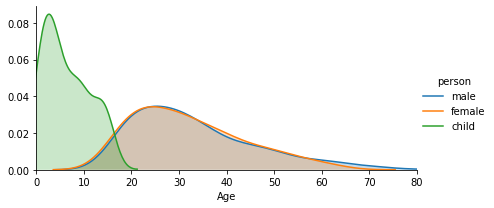

In [17]:
fig = sns.FacetGrid(titanic_df,hue = 'person',aspect = 2)
fig.map(sns.kdeplot,'Age',shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim = (0,oldest))
fig.add_legend()

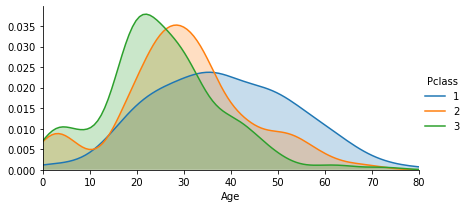

In [18]:
fig = sns.FacetGrid(titanic_df,hue = 'Pclass',aspect = 2)
fig.map(sns.kdeplot,'Age',shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim = (0,oldest))
fig.add_legend()

In [19]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [20]:
deck = titanic_df['Cabin'].dropna()

In [21]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

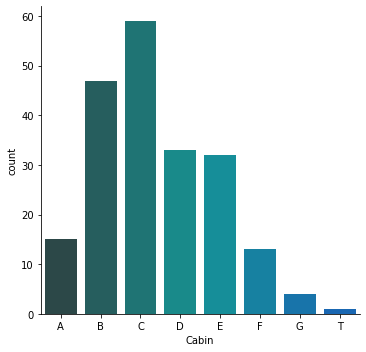

In [22]:
levels = []

for level in deck:
    levels.append(level[0])

levels.sort()
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']


sns.catplot('Cabin',data = cabin_df,kind = "count",palette='winter_d')

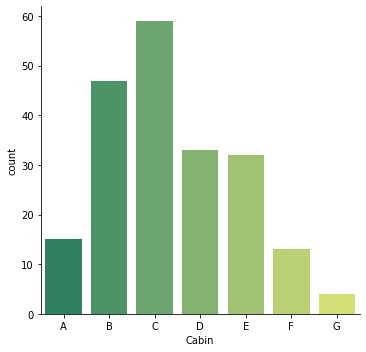

In [23]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

sns.catplot('Cabin',data = cabin_df,kind = "count",palette='summer')

In [24]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


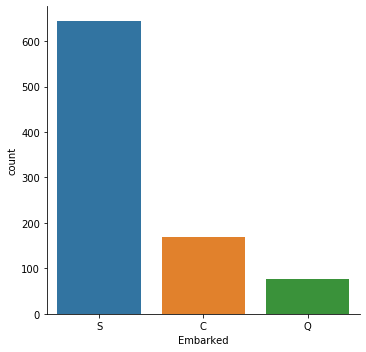

In [25]:
sns.catplot('Embarked',data = titanic_df,kind = "count")

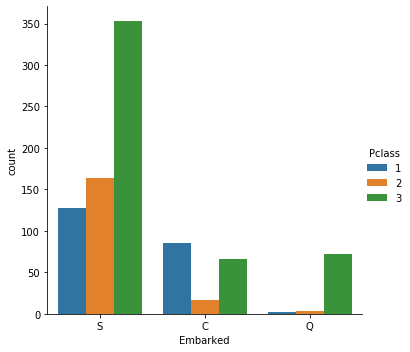

In [26]:
sns.catplot('Embarked',data = titanic_df,hue = 'Pclass',kind = "count")

In [27]:
# Who was alone and who was with family?

In [28]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [29]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [30]:
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [33]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\Users\AMANJAIN\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [34]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


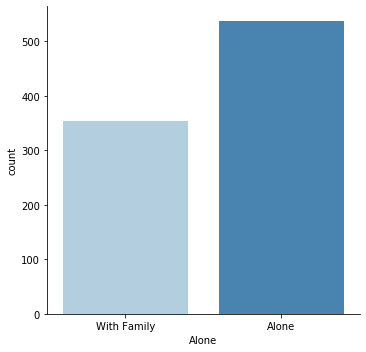

In [39]:
sns.catplot("Alone",data = titanic_df,palette='Blues',kind = "count")

In [41]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

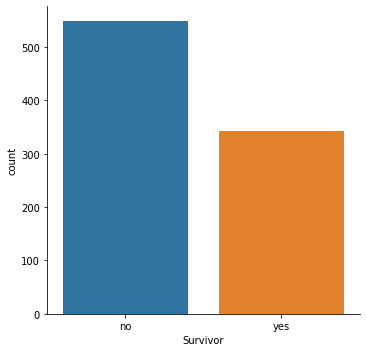

In [43]:
sns.catplot('Survivor',data = titanic_df,kind = "count")

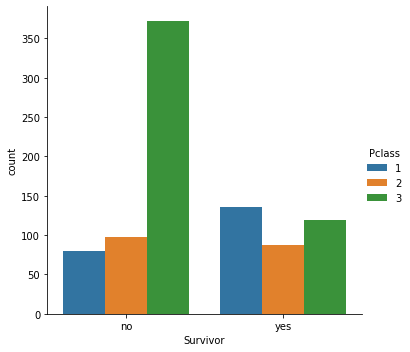

In [44]:
sns.catplot('Survivor',data = titanic_df,hue = "Pclass",kind = "count")

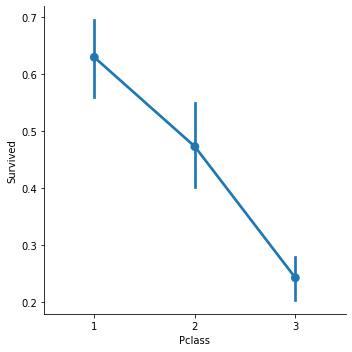

In [56]:
sns.catplot(x ='Pclass',y ='Survived',data = titanic_df,kind = 'point')

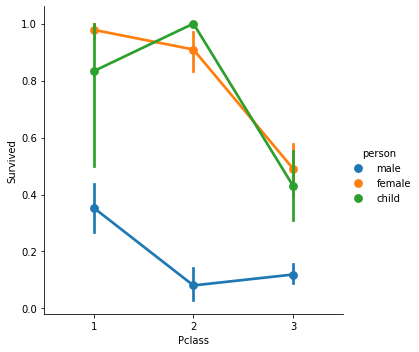

In [57]:
sns.catplot(x ='Pclass',y ='Survived',hue = 'person',data = titanic_df,kind = 'point')

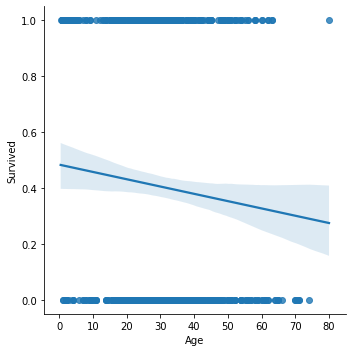

In [58]:
sns.lmplot('Age','Survived',data = titanic_df)

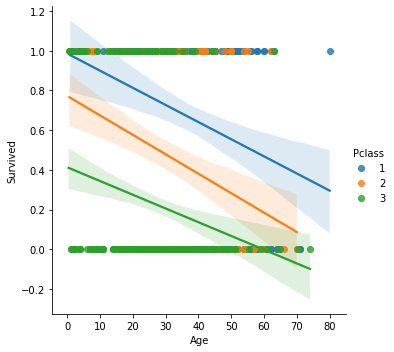

In [59]:
sns.lmplot('Age','Survived',hue = 'Pclass',data = titanic_df)

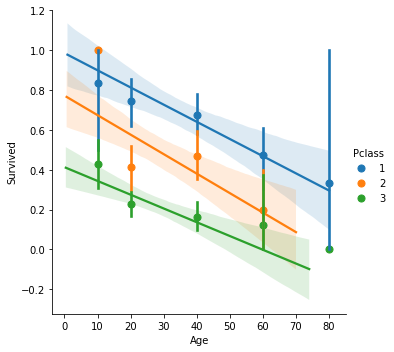

In [60]:
generations = [10,20,40,60,80]

sns.lmplot('Age','Survived',hue = 'Pclass',data = titanic_df,x_bins = generations)

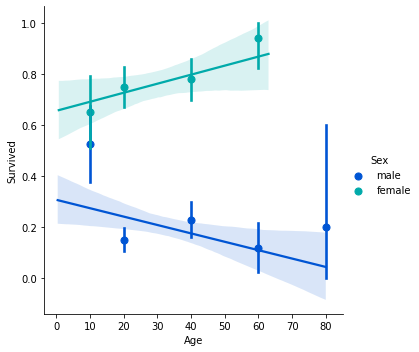

In [62]:
sns.lmplot('Age','Survived',hue = 'Sex',data = titanic_df, palette='winter',x_bins= generations)

1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?

2.) Did having a family member increase the odds of surviving the crash?


In [63]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


In [101]:
deck_survived_df = DataFrame(titanic_df['Cabin'])

In [102]:
deck_survived_df['Survived'] = titanic_df['Survived']

In [103]:
deck_survived_df = deck_survived_df.dropna()

In [106]:
deck = deck_survived_df.Cabin.str.get(0)

In [108]:
deck_survived_df['Deck'] = deck

In [110]:
deck_survived_df

,Cabin,Survived,Deck
1,C85,1,C
3,C123,1,C
6,E46,0,E
10,G6,1,G
11,C103,1,C
...,...,...,...
871,D35,1,D
872,B51 B53 B55,0,B
879,C50,1,C
887,B42,1,B


In [122]:
deck_survived_df['Survived'] = deck_survived_df.Survived.map({0:'Not Survived',1:'Survived'})

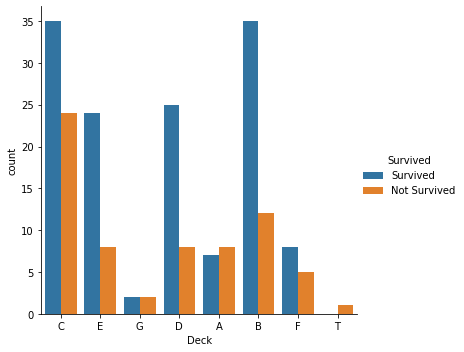

In [123]:
sns.catplot(x = 'Deck',data = deck_survived_df,hue = "Survived",kind = 'count')

In [128]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


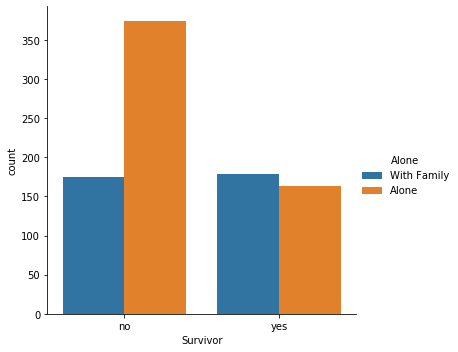

In [130]:
sns.catplot(x = 'Survivor',hue = 'Alone',data = titanic_df,kind = 'count')

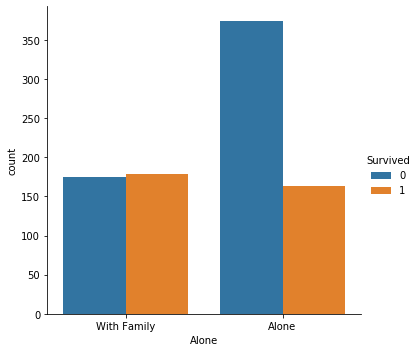

In [131]:
sns.catplot(x = 'Alone',hue = 'Survived',data = titanic_df,kind = 'count')